In [6]:
"""Summary of tensorflow basics.

From: Parag K. Mital, Jan 2016."""
# %% Import tensorflow and pyplot
import tensorflow as tf
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:


# %% tf.Graph represents a collection of tf.Operations
# You can create operations by writing out equations.
# By default, there is a graph: tf.get_default_graph()
# and any new operations are added to this graph.
# The result of a tf.Operation is a tf.Tensor, which holds
# the values.

# %% First a tf.Tensor
n_values = 32
x = tf.linspace(-3.0, 3.0, n_values)

# %% Construct a tf.Session to execute the graph.
sess = tf.Session()
result = sess.run(x)

# %% Alternatively pass a session to the eval fn:
x.eval(session=sess)
# x.eval() does not work, as it requires a session!

# %% We can setup an interactive session if we don't
# want to keep passing the session around:
sess.close()
sess = tf.InteractiveSession()

In [4]:

# %% Now this will work!
x.eval()

array([-3.        , -2.80645156, -2.61290312, -2.41935492, -2.22580647,
       -2.03225803, -1.83870971, -1.64516139, -1.45161295, -1.25806451,
       -1.06451619, -0.87096786, -0.67741942, -0.48387098, -0.29032278,
       -0.09677434,  0.0967741 ,  0.29032254,  0.48387098,  0.67741919,
        0.87096763,  1.06451607,  1.25806427,  1.45161295,  1.64516115,
        1.83870935,  2.03225803,  2.22580624,  2.41935444,  2.61290312,
        2.80645132,  3.        ], dtype=float32)

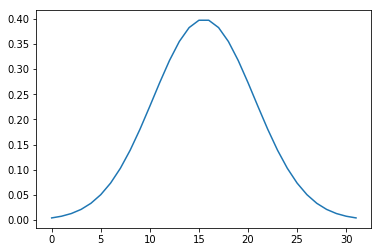

In [7]:



# %% Now a tf.Operation
# We'll use our values from [-3, 3] to create a Gaussian Distribution
sigma = 1.0
mean = 0.0
z = (tf.exp(tf.negative(tf.pow(x - mean, 2.0) /
                   (2.0 * tf.pow(sigma, 2.0)))) *
     (1.0 / (sigma * tf.sqrt(2.0 * 3.1415))))

# %% By default, new operations are added to the default Graph
assert z.graph is tf.get_default_graph()

# %% Execute the graph and plot the result
plt.plot(z.eval())

In [8]:
# %% We can find out the shape of a tensor like so:
print(z.get_shape())

# %% Or in a more friendly format
print(z.get_shape().as_list())

# %% Sometimes we may not know the shape of a tensor
# until it is computed in the graph.  In that case
# we should use the tf.shape fn, which will return a
# Tensor which can be eval'ed, rather than a discrete
# value of tf.Dimension
print(tf.shape(z).eval())

# %% We can combine tensors like so:
print(tf.stack([tf.shape(z), tf.shape(z), [3], [4]]).eval())

(32,)
[32]
[32]
[[32]
 [32]
 [ 3]
 [ 4]]


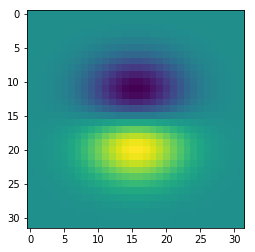

In [9]:


# %% Let's multiply the two to get a 2d gaussian
z_2d = tf.matmul(tf.reshape(z, [n_values, 1]), tf.reshape(z, [1, n_values]))

# %% Execute the graph and store the value that `out` represents in `result`.
plt.imshow(z_2d.eval())

# %% For fun let's create a gabor patch:
x = tf.reshape(tf.sin(tf.linspace(-3.0, 3.0, n_values)), [n_values, 1])
y = tf.reshape(tf.ones_like(x), [1, n_values])
z = tf.multiply(tf.matmul(x, y), z_2d)
plt.imshow(z.eval())

In [10]:


# %% We can also list all the operations of a graph:
ops = tf.get_default_graph().get_operations()
print([op.name for op in ops])

[u'LinSpace/start', u'LinSpace/stop', u'LinSpace/num', u'LinSpace', u'sub/y', u'sub', u'Pow/y', u'Pow', u'Pow_1/x', u'Pow_1/y', u'Pow_1', u'mul/x', u'mul', u'div', u'Neg', u'Exp', u'Sqrt/x', u'Sqrt', u'mul_1/x', u'mul_1', u'div_1/x', u'div_1', u'mul_2', u'LinSpace_1/start', u'LinSpace_1/stop', u'LinSpace_1/num', u'LinSpace_1', u'sub_1/y', u'sub_1', u'Pow_2/y', u'Pow_2', u'Pow_3/x', u'Pow_3/y', u'Pow_3', u'mul_3/x', u'mul_3', u'div_2', u'Neg_1', u'Exp_1', u'Sqrt_1/x', u'Sqrt_1', u'mul_4/x', u'mul_4', u'div_3/x', u'div_3', u'mul_5', u'sub_2/y', u'sub_2', u'Pow_4/y', u'Pow_4', u'Pow_5/x', u'Pow_5/y', u'Pow_5', u'mul_6/x', u'mul_6', u'div_4', u'Neg_2', u'Exp_2', u'Sqrt_2/x', u'Sqrt_2', u'mul_7/x', u'mul_7', u'div_5/x', u'div_5', u'mul_8', u'Shape', u'Shape_1', u'Shape_2', u'stack/2_1', u'stack/3_1', u'stack', u'Reshape/shape', u'Reshape', u'Reshape_1/shape', u'Reshape_1', u'MatMul', u'LinSpace_2/start', u'LinSpace_2/stop', u'LinSpace_2/num', u'LinSpace_2', u'Sin', u'Reshape_2/shape', u'Res

In [12]:


# %% Lets try creating a generic function for computing the same thing:
def gabor(n_values=32, sigma=1.0, mean=0.0):
    x = tf.linspace(-3.0, 3.0, n_values)
    z = (tf.exp(tf.negative(tf.pow(x - mean, 2.0) /
                       (2.0 * tf.pow(sigma, 2.0)))) *
         (1.0 / (sigma * tf.sqrt(2.0 * 3.1415))))
    gauss_kernel = tf.matmul(
        tf.reshape(z, [n_values, 1]), tf.reshape(z, [1, n_values]))
    x = tf.reshape(tf.sin(tf.linspace(-3.0, 3.0, n_values)), [n_values, 1])
    y = tf.reshape(tf.ones_like(x), [1, n_values])
    gabor_kernel = tf.multiply(tf.matmul(x, y), gauss_kernel)
    return gabor_kernel


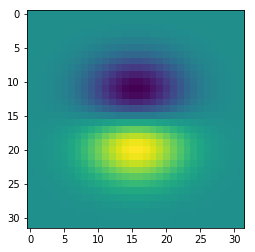

In [13]:
# %% Confirm this does something:
plt.imshow(gabor().eval())


In [14]:

# %% And another function which can convolve
def convolve(img, W):
    # The W matrix is only 2D
    # But conv2d will need a tensor which is 4d:
    # height x width x n_input x n_output
    if len(W.get_shape()) == 2:
        dims = W.get_shape().as_list() + [1, 1]
        W = tf.reshape(W, dims)

    if len(img.get_shape()) == 2:
        # num x height x width x channels
        dims = [1] + img.get_shape().as_list() + [1]
        img = tf.reshape(img, dims)
    elif len(img.get_shape()) == 3:
        dims = [1] + img.get_shape().as_list()
        img = tf.reshape(img, dims)
        # if the image is 3 channels, then our convolution
        # kernel needs to be repeated for each input channel
        W = tf.concat(axis=2, values=[W, W, W])

    # Stride is how many values to skip for the dimensions of
    # num, height, width, channels
    convolved = tf.nn.conv2d(img, W,
                             strides=[1, 1, 1, 1], padding='SAME')
    return convolved


(512, 512, 3)


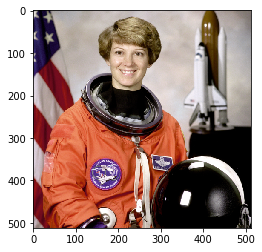

In [19]:

# %% Load up an image:
from skimage import data
img = data.astronaut()
plt.imshow(img)
print(img.shape)

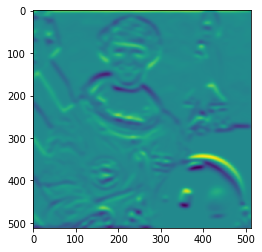

In [20]:


# %% Now create a placeholder for our graph which can store any input:
x = tf.placeholder(tf.float32, shape=img.shape)

# %% And a graph which can convolve our image with a gabor
out = convolve(x, gabor())

# %% Now send the image into the graph and compute the result
result = tf.squeeze(out).eval(feed_dict={x: img})
plt.imshow(result)


In [21]:
from skimage.filters import gabor_kernel

In [70]:
gk.real.shape

(43, 43)

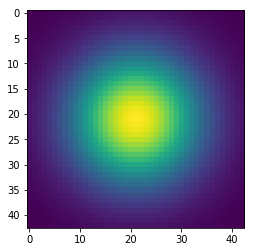

In [69]:
gk = gabor_kernel(frequency=2, sigma_x = 9., sigma_y = 9., n_stds= 2.3)    
plt.imshow(gk.real)

In [26]:
import numpy as np

In [134]:
frequency = freq
theta = orient
offset = 0
sigma_x = 9
sigma_y = 9
n_stds= 2.3

x0 = np.ceil(max(np.abs(n_stds * sigma_x * np.cos(theta)),
np.abs(n_stds * sigma_y * np.sin(theta)), 1))

print [-x0:x0]

SyntaxError: invalid syntax (<ipython-input-134-f7db30513339>, line 11)

In [136]:
np.mgrid[-x0:x0 + 1, -x0:x0 + 1].shape

(2, 41, 41)

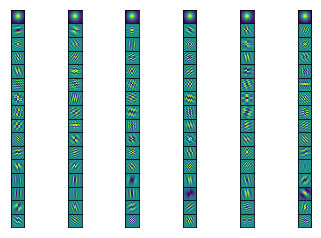

In [143]:
orientations = [(1. / 16 * 2.) * i for i in range(16)]
frequencies = [2., 3., 4., 6., 11., 18.]

f, axarr = plt.subplots(len(orientations), len(frequencies))

for i,orient in enumerate(orientations):
    for j,freq in enumerate(frequencies):
        gk = gabor_kernel(
            frequency = freq, 
            theta = orient,
            offset = 0,
            sigma_x = 9,
            sigma_y = 9,
            n_stds= 2.3,
        )
        axarr[i,j].imshow(gk.real)
        axarr[i,j].get_xaxis().set_visible(False)
        axarr[i,j].get_yaxis().set_visible(False)
f.subplots_adjust(hspace=0)

In [123]:

# %% And another function which can convolve
def convolve2(img, W):
    print W.shape
    # The W matrix is only 2D
    # But conv2d will need a tensor which is 4d:
    # height x width x n_input x n_output
    if len(W.shape) == 2:
        dims = list(W.shape) + [1, 1]
        W = tf.reshape(W, dims)
        print W.get_shape()

    if len(img.get_shape()) == 2:
        # num x height x width x channels
        dims = [1] + img.get_shape().as_list() + [1]
        img = tf.reshape(img, dims)
        print W.get_shape()
    elif len(img.get_shape()) == 3:
        dims = [1] + img.get_shape().as_list()
        img = tf.reshape(img, dims)
        # if the image is 3 channels, then our convolution
        # kernel needs to be repeated for each input channel
        W = tf.concat(axis=2, values=[W, W, W])

    # Stride is how many values to skip for the dimensions of
    # num, height, width, channels
    print img.get_shape()
    print W.get_shape()
    convolved = tf.nn.conv2d(img, W,
                             strides=[1, 1, 1, 1], padding='SAME')
    return convolved


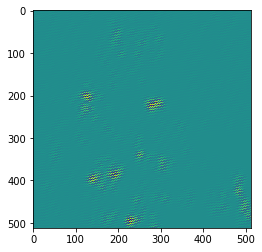

In [85]:

# %% Now create a placeholder for our graph which can store any input:
x = tf.placeholder(tf.float32, shape=img.shape)

# %% And a graph which can convolve our image with a gabor
out = convolve2(x, gk.real.astype(np.float32))

# %% Now send the image into the graph and compute the result
result = tf.squeeze(out).eval(feed_dict={x: img})
plt.imshow(result)

In [ ]:
img_grey = tf.image.rgb_to_grayscale(
    img.astype(np.float32),
    name=None
)
img_grey = img_grey.eval()


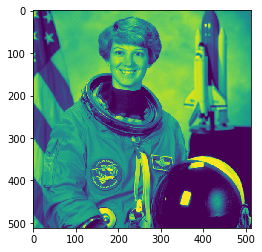

In [108]:
plt.imshow(img_grey.eval()[:,:,0])

In [125]:
img_grey.shape

(512, 512, 1)

(41, 41)
(41, 41, 1, 1)
(41, 41, 1, 1)
(1, 512, 512, 1)
(41, 41, 1, 1)


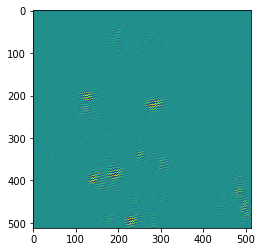

In [126]:

#%% Now create a placeholder for our graph which can store any input:
x = tf.placeholder(tf.float32, shape=img_grey[:,:,0].shape)

# %% And a graph which can convolve our image with a gabor
out = convolve2(x, gk.real.astype(np.float32))

# %% Now send the image into the graph and compute the result
result = tf.squeeze(out).eval(feed_dict={x: img_grey[:,:,0]})
plt.imshow(result)

In [117]:
gk.real.astype(np.float32).shape

(41, 41)

In [142]:
import cv2

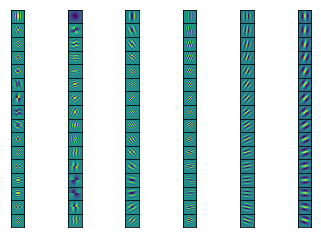

In [145]:
orientations = [(1. / 16 * 2.) * i for i in range(16)]
frequencies = [2., 3., 4., 6., 11., 18.]

f, axarr = plt.subplots(len(orientations), len(frequencies))

for i,orient in enumerate(orientations):
    for j,freq in enumerate(frequencies):
        gk = cv2.getGaborKernel(
            (43, 43),
            9.0, 
            orient,
            freq,
            1,
            0,
            ktype=cv2.CV_32F
        )
        axarr[i,j].imshow(gk.real)
        axarr[i,j].get_xaxis().set_visible(False)
        axarr[i,j].get_yaxis().set_visible(False)
f.subplots_adjust(hspace=0)

(43, 43)
(43, 43, 1, 1)
(43, 43, 1, 1)
(1, 512, 512, 1)
(43, 43, 1, 1)


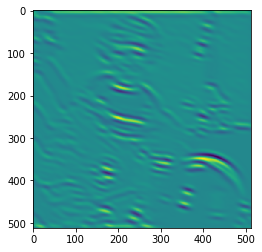

In [150]:

#%% Now create a placeholder for our graph which can store any input:
x = tf.placeholder(tf.float32, shape=img_grey[:,:,0].shape)

# %% And a graph which can convolve our image with a gabor
out = convolve2(x, gk.real.astype(np.float32))

# %% Now send the image into the graph and compute the result
result = tf.squeeze(out).eval(feed_dict={x: img_grey[:,:,0]})
plt.imshow(result)

In [151]:
def get_gabor_kernels(ksize, orientations, frequencies):
    # [filter_height, filter_width, in_channels, out_channels]
    out_depth = len(orientations) * len(frequencies)
    kernels = np.zeros((ksize, ksize,out_depth), dtype=np.float64)
    ix = 0
    for i,orient in enumerate(orientations):
        for j,freq in enumerate(frequencies):
            kernels[:,:,ix]= cv2.getGaborKernel(
                (43, 43),
                9.0, 
                orient,
                freq,
                1,
                0,
                ktype=cv2.CV_32F
            )
            ix += 1
    return kernels

In [153]:
kernels = get_gabor_kernels(43, orientations, frequencies)

In [157]:
dims =[43, 43, 1, 96]

In [158]:
tk = tf.reshape(kernels, dims)

In [159]:
tk.get_shape()

TensorShape([Dimension(43), Dimension(43), Dimension(1), Dimension(96)])

In [162]:
tk.eval()[:,:,0,0] - kernels[:,:,0]

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [163]:
kernels.shape[:-1]

(43, 43)

In [170]:
from scipy.stats.stats import pearsonr   
a = [1,4,6]
b = [1,2,3] 
c = [3, 1, 3]
print pearsonr(a,b)

(0.99339926779878274, 0.073186395040328034)


In [172]:
np.corrcoef(a,b)

array([[ 1.        ,  0.99339927],
       [ 0.99339927,  1.        ]])

In [173]:
X = np.array([a,b,c])

In [174]:
    np.corrcoef(X)

array([[ 1.        ,  0.99339927, -0.11470787],
       [ 0.99339927,  1.        ,  0.        ],
       [-0.11470787,  0.        ,  1.        ]])